In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
#for visualisation
import plotly.offline as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
# from prettytable import PrettyTable
#for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import sys
!{sys.executable} -m pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
%matplotlib inline

In [3]:
#read clean data
solar_ctry = pd.read_csv('../data/solar-ctry-clean.csv')
#preview data
print("---------------------------- Top 5 rows of solar_ctry -------------------------")
display(solar_ctry.head())
print(f'Shape of solar_ctry : {solar_ctry.shape}')
print("----------------------------- Data types in solar_ctry ------------------------")
print(solar_ctry.dtypes)

---------------------------- Top 5 rows of solar_ctry -------------------------


Austria  Belgium  Bulgaria  Switzerland  Cyprus  Czech Republic  Germany  \
0      0.0      0.0       0.0          0.0       0             0.0      0.0   
1      0.0      0.0       0.0          0.0       0             0.0      0.0   
2      0.0      0.0       0.0          0.0       0             0.0      0.0   
3      0.0      0.0       0.0          0.0       0             0.0      0.0   
4      0.0      0.0       0.0          0.0       0             0.0      0.0   

   Denmark  Estonia  Spain  Finland  France  Greece  Croatia  Hungary  \
0      0.0      0.0    0.0      0.0     0.0     0.0      0.0      0.0   
1      0.0      0.0    0.0      0.0     0.0     0.0      0.0      0.0   
2      0.0      0.0    0.0      0.0     0.0     0.0      0.0      0.0   
3      0.0      0.0    0.0      0.0     0.0     0.0      0.0      0.0   
4      0.0      0.0    0.0      0.0     0.0     0.0      0.0      0.0   

   Ireland  Italy  Lithuania  Luxembourg  Latvia  Netherlands  Norway  Poland  \
0      0.0    0.0        0.0         0.0     0.0          0.0     0.0     0.0   
1      0.0    0.0        0.0         0.0     0.0          0.0     0.0     0.0   
2      0.0    0.0        0.0         0.0     0.0          0.0     0.0     0.0   
3      0.0    0.0        0.0         0.0     0.0          0.0     0.0     0.0   
4      0.0    0.0        0.0         0.0     0.0          0.0     0.0     0.0   

   Portugal  Romania  Slovenia  Slovakia  Sweden  United Kingdom  \
0       0.0      0.0       0.0       0.0     0.0             0.0   
1       0.0      0.0       0.0       0.0     0.0             0.0   
2       0.0      0.0       0.0       0.0     0.0             0.0   
3       0.0      0.0       0.0       0.0     0.0             0.0   
4       0.0      0.0       0.0       0.0     0.0             0.0   

                  time  hour  week  month  
0  1986-01-01 00:00:00     0     1      1  
1  1986-01-01 01:00:00     1     1      1  
2  1986-01-01 02:00:00     2     1      1  
3  1986-01-01 03:00:00     3     1      1  
4  1986-01-01 04:00:00     4     1      1

Shape of solar_ctry : (262968, 33)
----------------------------- Data types in solar_ctry ------------------------
Austria           float64
Belgium           float64
Bulgaria          float64
Switzerland       float64
Cyprus              int64
Czech Republic    float64
Germany           float64
Denmark           float64
Estonia           float64
Spain             float64
Finland           float64
France            float64
Greece            float64
Croatia           float64
Hungary           float64
Ireland           float64
Italy             float64
Lithuania         float64
Luxembourg        float64
Latvia            float64
Netherlands       float64
Norway            float64
Poland            float64
Portugal          float64
Romania           float64
Slovenia          float64
Slovakia          float64
Sweden            float64
United Kingdom    float64
time               object
hour                int64
week                int64
month               int64
dtype: object


In [5]:
solar_ctry.head(10)

Austria   Belgium  Bulgaria  Switzerland  Cyprus  Czech Republic  \
0  0.000000  0.000000  0.000000     0.000000       0        0.000000   
1  0.000000  0.000000  0.000000     0.000000       0        0.000000   
2  0.000000  0.000000  0.000000     0.000000       0        0.000000   
3  0.000000  0.000000  0.000000     0.000000       0        0.000000   
4  0.000000  0.000000  0.000000     0.000000       0        0.000000   
5  0.000000  0.000000  0.000000     0.000000       0        0.000000   
6  0.000000  0.000000  0.000000     0.000000       0        0.000000   
7  0.000000  0.000000  0.052450     0.000000       0        0.000000   
8  0.117483  0.000000  0.135141     0.068950       0        0.069215   
9  0.166434  0.064906  0.206412     0.152344       0        0.127238   

    Germany   Denmark   Estonia     Spain   Finland    France    Greece  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.005445   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.058224   
8  0.019261  0.000000  0.030179  0.043921  0.000000  0.042003  0.094667   
9  0.069999  0.044591  0.074671  0.146012  0.031256  0.123843  0.140325   

    Croatia   Hungary  Ireland     Italy  Lithuania  Luxembourg    Latvia  \
0  0.000000  0.000000      0.0  0.000000   0.000000    0.000000  0.000000   
1  0.000000  0.000000      0.0  0.000000   0.000000    0.000000  0.000000   
2  0.000000  0.000000      0.0  0.000000   0.000000    0.000000  0.000000   
3  0.000000  0.000000      0.0  0.000000   0.000000    0.000000  0.000000   
4  0.000000  0.000000      0.0  0.000000   0.000000    0.000000  0.000000   
5  0.000000  0.000000      0.0  0.000000   0.000000    0.000000  0.000000   
6  0.000000  0.000000      0.0  0.000000   0.000000    0.000000  0.000000   
7  0.014195  0.030528      0.0  0.010128   0.000000    0.000000  0.000000   
8  0.062957  0.070537      0.0  0.075378   0.078881    0.000000  0.043222   
9  0.093344  0.078465      0.0  0.126087   0.175601    0.030742  0.089203   

   Netherlands    Norway    Poland  Portugal   Romania  Slovenia  Slovakia  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7     0.000000  0.000000  0.015086  0.000000  0.059359  0.000000  0.024719   
8     0.000000  0.000000  0.065217  0.000000  0.098980  0.048753  0.180386   
9     0.058231  0.020474  0.108220  0.125138  0.111118  0.052076  0.238421   

     Sweden  United Kingdom                 time  hour  week  month  
0  0.000000        0.000000  1986-01-01 00:00:00     0     1      1  
1  0.000000        0.000000  1986-01-01 01:00:00     1     1      1  
2  0.000000        0.000000  1986-01-01 02:00:00     2     1      1  
3  0.000000        0.000000  1986-01-01 03:00:00     3     1      1  
4  0.000000        0.000000  1986-01-01 04:00:00     4     1      1  
5  0.000000        0.000000  1986-01-01 05:00:00     5     1      1  
6  0.000000        0.000000  1986-01-01 06:00:00     6     1      1  
7  0.000000        0.000000  1986-01-01 07:00:00     7     1      1  
8  0.000000        0.000000  1986-01-01 08:00:00

In [7]:
# Drop unnecessary columns (time, hour, week, month)
dfchoropleth = solar_ctry.drop(columns=['time', 'hour', 'week', 'month'])

# Calculate the mean solar potential for each country
dfchoropleth.loc['mean'] = dfchoropleth.mean()  # Get the mean for each country

# Select only the row with mean values for each country
dfchoropleth = dfchoropleth.loc[['mean'], :]  # Extract only the mean row

# Transpose the data to have countries as rows and columns as solar exposure values
dfchoropleth = dfchoropleth.T.reset_index().rename(columns={'index': 'country', 'mean': 'avg_solar_exposure'})

# Display the resulting dataset
print(dfchoropleth.head(10))


          country  avg_solar_exposure
0         Austria            0.126157
1         Belgium            0.112159
2        Bulgaria            0.143262
3     Switzerland            0.128379
4          Cyprus            0.000000
5  Czech Republic            0.116991
6         Germany            0.097755
7         Denmark            0.106141
8         Estonia            0.089150
9           Spain            0.171881


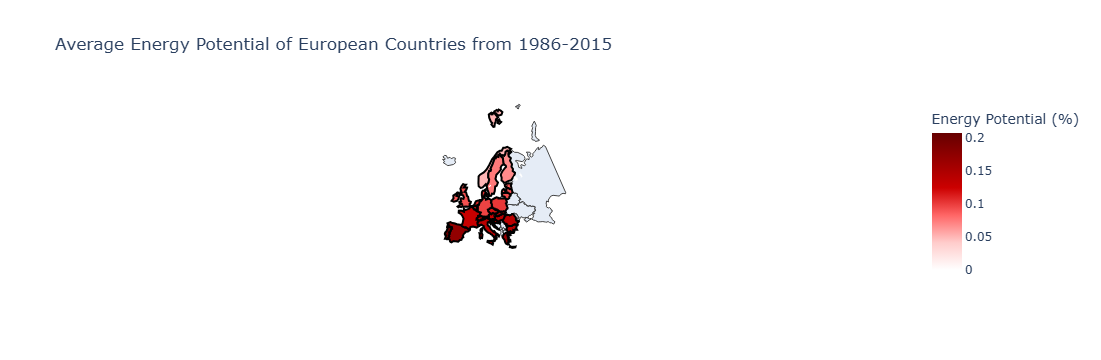

In [9]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Define the color scale for the choropleth map
color = [[0, 'rgb(255,255,255)'],  # Lightest red (white)
         [0.2, 'rgb(255,204,203)'],  # Light red
         [0.4, 'rgb(255,102,102)'],  # Soft red
         [0.6, 'rgb(204,0,0)'],      # Strong red
         [0.8, 'rgb(153,0,0)'],      # Dark red
         [1.0, 'rgb(102,0,0)']]      # Darkest red

# Create the choropleth map data
data = [go.Choropleth(
    colorscale=color,
    autocolorscale=False,
    locations=dfchoropleth['country'],  # Country names
    z=dfchoropleth['avg_solar_exposure'],  # Average solar energy exposure
    locationmode='country names',
    text=dfchoropleth['country'],  # Country names to show on hover
    marker=dict(line=dict(color='rgb(0,0,0)', width=2)),
    colorbar=dict(title="Energy Potential (%)")
)]

# Layout for the map
layout = go.Layout(
    title='Average Energy Potential of European Countries from 1986-2015',
    geo=dict(
        scope='europe',  # Focus on European countries
        showlakes=True,
        lakecolor='rgb(255,255,255)'
    )
)

# Create the figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='choropleth-map-energy')


There are a total of 29 countries but they can be grouped in clusters for analysis. This is where countries with similar energy potential would be in one cluster together. It would then be a more useful analysis to look at one country from each cluster as opposed to analysing each of the 28 countries.

As there is voluminous data, I'd take just the last year records (ie. 2015) and determine clusters based on these.

In [13]:
%%time
#compute number of hours in the last year
last_year = 24*365
#transpose the period
solar_ctry_2015_transposed = solar_ctry[-last_year:].T
#drop time, hour, month, week
solar_ctry_2015_transposed.drop(index=['time','hour','week','month'], inplace=True)
#check
print(" head ".center(18,'-'))
display(solar_ctry_2015_transposed.head())
print(" tail ".center(18,'-'))
display(solar_ctry_2015_transposed.tail())

------ head ------


254208 254209 254210 254211 254212 254213    254214    254215  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.027972   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0       0.0       0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0  0.035793  0.192023   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.014463   
Cyprus           0      0      0      0      0      0         0         0   

               254216    254217    254218    254219    254220    254221  \
Austria      0.113287  0.127273  0.116084  0.113287  0.109091  0.099301   
Belgium       0.01971  0.232778  0.392154  0.456041  0.442448  0.302101   
Bulgaria     0.302919  0.354551  0.382422  0.369163  0.313377  0.225553   
Switzerland  0.107674  0.163776  0.185244  0.186777  0.181647  0.175124   
Cyprus              0         0         0         0         0         0   

               254222    254223 254224 254225 254226 254227 254228 254229  \
Austria      0.064336  0.020979    0.0    0.0    0.0    0.0    0.0    0.0   
Belgium      0.183844  0.029225    0.0    0.0    0.0    0.0    0.0    0.0   
Bulgaria     0.065662       0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland  0.141796  0.053878    0.0    0.0    0.0    0.0    0.0    0.0   
Cyprus              0         0      0      0      0      0      0      0   

            254230 254231 254232 254233 254234 254235 254236 254237    254238  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.028949   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Cyprus           0      0      0      0      0      0      0      0         0   

               254239    254240    254241    254242    254243    254244  \
Austria      0.029371  0.163636  0.272727  0.331469  0.369231  0.265734   
Belgium           0.0  0.004418  0.029564  0.068644  0.169231  0.289188   
Bulgaria     0.152873  0.261095  0.298811   0.28495  0.285919  0.247331   
Switzerland  0.014446  0.092549  0.181713  0.226897  0.232371  0.209207   
Cyprus              0         0         0         0         0         0   

               254245    254246    254247 254248 254249 254250 254251 254252  \
Austria      0.138462  0.075524  0.020979    0.0    0.0    0.0    0.0    0.0   
Belgium      0.341861  0.257245  0.065925    0.0    0.0    0.0    0.0    0.0   
Bulgaria     0.154392  0.045598       0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland  0.130143  0.092417  0.031496    0.0    0.0    0.0    0.0    0.0   
Cyprus              0         0         0      0      0      0      0      0   

            254253 254254 254255 254256 254257 254258 254259 254260 254261  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Cyprus           0      0      0      0      0      0      0      0      0   

               254262    254263    254264    254265    254266    254267  \
Austria           0.0  0.039161  0.226573  0.299301  0.324476  0.276923   
Belgium           0.0       0.0  0.003738  0.016991  0.027526  0.039759   
Bulgaria     0.013027    0.0973  0.162705  0.266804  0.303392  0.307404   
Switzerland       0.0  0.014529   0.08221  0.150378   0.18557  0.170197   
Cyprus              0         0         0         0         0         0   

               254268    254269    254270    254271 254272 254273 254274  \
Austria      0.236364  0.151049  0.074126  0.018182    0.0    0.0    0.0   
Belgium      0.064226  0.046216  0.027865  0.016651    0.0    0.0    0.0   
Bulgaria     0.287228  0.216665  0.083527       0.0    0.0    0.0   

------ tail ------


254208 254209 254210 254211 254212 254213    254214    254215  \
Romania           0.0    0.0    0.0    0.0    0.0    0.0  0.029777  0.126217   
Slovenia          0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.011247   
Slovakia          0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.063098   
Sweden            0.0    0.0    0.0    0.0    0.0    0.0       0.0       0.0   
United Kingdom    0.0    0.0    0.0    0.0    0.0    0.0       0.0       0.0   

                  254216    254217    254218    254219    254220    254221  \
Romania         0.160196  0.168764  0.156882  0.145611  0.119438  0.076255   
Slovenia         0.11436  0.153591  0.143488  0.132949  0.121438  0.101175   
Slovakia        0.127954  0.143379  0.101459  0.087949  0.080617  0.059433   
Sweden           0.02559  0.028774  0.024368  0.029511  0.026991   0.02574   
United Kingdom   0.01436  0.018766  0.035738  0.042646  0.048847  0.043734   

                  254222    254223    254224 254225 254226 254227 254228  \
Romania         0.024303       0.0       0.0    0.0    0.0    0.0    0.0   
Slovenia        0.040024  0.003518       0.0    0.0    0.0    0.0    0.0   
Slovakia        0.031971       0.0       0.0    0.0    0.0    0.0    0.0   
Sweden          0.015349       0.0       0.0    0.0    0.0    0.0    0.0   
United Kingdom  0.035139  0.017733  0.008758    0.0    0.0    0.0    0.0   

               254229 254230 254231 254232 254233 254234 254235 254236 254237  \
Romania           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Slovenia          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Slovakia          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Sweden            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
United Kingdom    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  254238    254239    254240    254241    254242    254243  \
Romania         0.026688  0.111632  0.168462  0.181327  0.151029  0.141133   
Slovenia             0.0   0.02604  0.160642  0.201956  0.274091  0.310509   
Slovakia             0.0  0.033577    0.0866  0.145013  0.183728  0.203672   
Sweden               0.0       0.0  0.021616  0.035272  0.053339  0.061699   
United Kingdom       0.0       0.0  0.014415  0.079417  0.193538  0.287261   

                  254244    254245    254246    254247    254248 254249  \
Romania         0.109727  0.076031  0.029628       0.0       0.0    0.0   
Slovenia        0.290087  0.167587  0.052986  0.003466       0.0    0.0   
Slovakia        0.152998  0.078747   0.02382       0.0       0.0    0.0   
Sweden          0.066683  0.028761  0.015128       0.0       0.0    0.0   
United Kingdom  0.327187  0.289763  0.201915  0.067396  0.008839    0.0   

               254250 254251 254252 254253 254254 254255 254256 254257 254258  \
Romania           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Slovenia          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Slovakia          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Sweden            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
United Kingdom    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

               254259 254260 254261    254262    254263    254264    254265  \
Romania           0.0    0.0    0.0  0.028449  0.104386    0.1448  0.154475   
Slovenia          0.0    0.0    0.0       0.0  0.010889  0.074865  0.111259   
Slovakia          0.0    0.0    0.0       0.0   0.05676  0.170752  0.267193   
Sweden            0.0    0.0    0.0       0.0       0.0  0.025668  0.076981   
United Kingdom    0.0    0.0    0.0       0.0       0.0  0.014523  0.036608   

                  254266    254267    254268    254269    254270    254271  \
Romania         0.155627  0.151528  0.133545  0.104294  0.032677       0.0   
Slovenia         0.12801  0.143499  0.120163   0.12307  0.049453  0.002922   
Slova

CPU times: total: 6.2 s
Wall time: 6.27 s


K-means

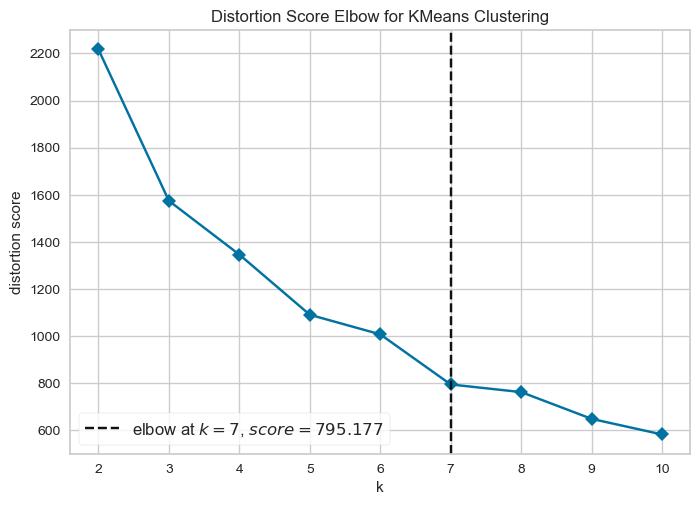

CPU times: total: 13.4 s
Wall time: 1.51 s


In [15]:
%%time
#instantiate 
km = KMeans()
elbow_viz = KElbowVisualizer(km, k=(2,11), timings=False)
#fit and draw
elbow_viz.fit(solar_ctry_2015_transposed)
elbow_viz.poof()
plt.show()

# Elbow Method for Optimal k in K-Means Clustering

The **Elbow Method** is used to determine the optimal number of clusters (**k**) in **K-Means clustering** by plotting the **distortion score (inertia)** against different values of **k**.

## Interpretation of the Plot:

1. **X-axis (k)**: Represents the number of clusters.
2. **Y-axis (Distortion Score)**: Represents the within-cluster sum of squared distances (also called inertia). A lower score indicates that data points are closer to their cluster centers.
3. **Curve Trend**:
   - Initially, the distortion score drops significantly as **k** increases.
   - After a certain point, the decrease slows, indicating diminishing returns when adding more clusters.
4. **Elbow Point (k = 7)**:
   - The dashed vertical line at **k = 7** indicates the "elbow" point.
   - At **k = 6**, the distortion score is **927.533**.
   - This suggests that using **5 clusters** is a good balance between minimizing variance and avoiding unnecessary complexity.

## Conclusion:
The **optimal number of clusters for this dataset is 7**, as adding more clusters beyond this does not yield a significant reduction in distortion score.



In [17]:
# add cluster labels to the respective countries
km = KMeans(n_clusters=7,max_iter=50)
km.fit(solar_ctry_2015_transposed) #fit
cluster_labels = km.labels_ #set cluster labels
solar_ctry_2015_transposed = solar_ctry_2015_transposed.assign(cluster=cluster_labels) # assign to original dataframe
#preview data
solar_ctry_2015_transposed.head()

254208 254209 254210 254211 254212 254213    254214    254215  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.027972   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0       0.0       0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0  0.035793  0.192023   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.014463   
Cyprus           0      0      0      0      0      0         0         0   

               254216    254217    254218    254219    254220    254221  \
Austria      0.113287  0.127273  0.116084  0.113287  0.109091  0.099301   
Belgium       0.01971  0.232778  0.392154  0.456041  0.442448  0.302101   
Bulgaria     0.302919  0.354551  0.382422  0.369163  0.313377  0.225553   
Switzerland  0.107674  0.163776  0.185244  0.186777  0.181647  0.175124   
Cyprus              0         0         0         0         0         0   

               254222    254223 254224 254225 254226 254227 254228 254229  \
Austria      0.064336  0.020979    0.0    0.0    0.0    0.0    0.0    0.0   
Belgium      0.183844  0.029225    0.0    0.0    0.0    0.0    0.0    0.0   
Bulgaria     0.065662       0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland  0.141796  0.053878    0.0    0.0    0.0    0.0    0.0    0.0   
Cyprus              0         0      0      0      0      0      0      0   

            254230 254231 254232 254233 254234 254235 254236 254237    254238  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.028949   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Cyprus           0      0      0      0      0      0      0      0         0   

               254239    254240    254241    254242    254243    254244  \
Austria      0.029371  0.163636  0.272727  0.331469  0.369231  0.265734   
Belgium           0.0  0.004418  0.029564  0.068644  0.169231  0.289188   
Bulgaria     0.152873  0.261095  0.298811   0.28495  0.285919  0.247331   
Switzerland  0.014446  0.092549  0.181713  0.226897  0.232371  0.209207   
Cyprus              0         0         0         0         0         0   

               254245    254246    254247 254248 254249 254250 254251 254252  \
Austria      0.138462  0.075524  0.020979    0.0    0.0    0.0    0.0    0.0   
Belgium      0.341861  0.257245  0.065925    0.0    0.0    0.0    0.0    0.0   
Bulgaria     0.154392  0.045598       0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland  0.130143  0.092417  0.031496    0.0    0.0    0.0    0.0    0.0   
Cyprus              0         0         0      0      0      0      0      0   

            254253 254254 254255 254256 254257 254258 254259 254260 254261  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Cyprus           0      0      0      0      0      0      0      0      0   

               254262    254263    254264    254265    254266    254267  \
Austria           0.0  0.039161  0.226573  0.299301  0.324476  0.276923   
Belgium           0.0       0.0  0.003738  0.016991  0.027526  0.039759   
Bulgaria     0.013027    0.0973  0.162705  0.266804  0.303392  0.307404   
Switzerland       0.0  0.014529   0.08221  0.150378   0.18557  0.170197   
Cyprus              0         0         0         0         0         0   

               254268    254269    254270    254271 254272 254273 254274  \
Austria      0.236364  0.151049  0.074126  0.018182    0.0    0.0    0.0   
Belgium      0.064226  0.046216  0.027865  0.016651    0.0    0.0    0.0   
Bulgaria     0.287228  0.216665  0.083527       0.0    0.0    0.0   

In [19]:
import pandas as pd
from IPython.display import display

# Ensure full display of lists in DataFrame
pd.set_option('display.max_colwidth', None)

# Create a table grouping countries by their cluster
cluster_table = solar_ctry_2015_transposed.groupby('cluster').apply(lambda x: ', '.join(x.index)).reset_index()
cluster_table.columns = ['Cluster', 'Countries']

# Convert to a DataFrame for better display
cluster_df = pd.DataFrame(cluster_table)

# Display the table properly in a Jupyter Notebook
display(cluster_df)  # Works best in Jupyter


Cluster                                                       Countries
0        0                                                 Spain, Portugal
1        1                    Germany, Denmark, France, Luxembourg, Poland
2        2     Cyprus, Estonia, Finland, Lithuania, Latvia, Norway, Sweden
3        3                                         Ireland, United Kingdom
4        4  Austria, Switzerland, Czech Republic, Croatia, Italy, Slovenia
5        5                                            Belgium, Netherlands
6        6                    Bulgaria, Greece, Hungary, Romania, Slovakia

DBSCAN 

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [149]:
# -------------------------------
# 2. Data Scaling
# -------------------------------
# # Scaling the data ensures that each feature contributes equally to the distance calculations.
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(solar_ctry_2015_transposed)

# -------------------------------
# 3. Agglomerative Clustering
# -------------------------------
# Initialize Agglomerative Clustering.
# Note: When using linkage='ward', only Euclidean distance is accepted, so we don't specify an affinity.
agg_cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')

# Fit the model and predict cluster labels
labels = agg_cluster.fit_predict(solar_ctry_2015_transposed)

# Assign the cluster labels to the DataFrame
solar_ctry_2015_transposed['agg_cluster'] = labels

# Preview clustering results
print("Agglomerative Clustering Results".center(40, '-'))
display(solar_ctry_2015_transposed.head())

# -------------------------------
# 4. Grouping and Displaying Clusters
# -------------------------------
# Create a table that groups countries by their Agglomerative Cluster label.
agg_cluster_table = solar_ctry_2015_transposed.groupby('agg_cluster').apply(
    lambda x: ', '.join(x.index)
).reset_index()
agg_cluster_table.columns = ['Cluster', 'Countries']

# Display the final cluster grouping
display(agg_cluster_table)

----Agglomerative Clustering Results----


254208 254209 254210 254211 254212 254213    254214    254215  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.027972   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0       0.0       0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0  0.035793  0.192023   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0       0.0  0.014463   
Cyprus           0      0      0      0      0      0         0         0   

               254216    254217    254218    254219    254220    254221  \
Austria      0.113287  0.127273  0.116084  0.113287  0.109091  0.099301   
Belgium       0.01971  0.232778  0.392154  0.456041  0.442448  0.302101   
Bulgaria     0.302919  0.354551  0.382422  0.369163  0.313377  0.225553   
Switzerland  0.107674  0.163776  0.185244  0.186777  0.181647  0.175124   
Cyprus              0         0         0         0         0         0   

               254222    254223 254224 254225 254226 254227 254228 254229  \
Austria      0.064336  0.020979    0.0    0.0    0.0    0.0    0.0    0.0   
Belgium      0.183844  0.029225    0.0    0.0    0.0    0.0    0.0    0.0   
Bulgaria     0.065662       0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland  0.141796  0.053878    0.0    0.0    0.0    0.0    0.0    0.0   
Cyprus              0         0      0      0      0      0      0      0   

            254230 254231 254232 254233 254234 254235 254236 254237    254238  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.028949   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       0.0   
Cyprus           0      0      0      0      0      0      0      0         0   

               254239    254240    254241    254242    254243    254244  \
Austria      0.029371  0.163636  0.272727  0.331469  0.369231  0.265734   
Belgium           0.0  0.004418  0.029564  0.068644  0.169231  0.289188   
Bulgaria     0.152873  0.261095  0.298811   0.28495  0.285919  0.247331   
Switzerland  0.014446  0.092549  0.181713  0.226897  0.232371  0.209207   
Cyprus              0         0         0         0         0         0   

               254245    254246    254247 254248 254249 254250 254251 254252  \
Austria      0.138462  0.075524  0.020979    0.0    0.0    0.0    0.0    0.0   
Belgium      0.341861  0.257245  0.065925    0.0    0.0    0.0    0.0    0.0   
Bulgaria     0.154392  0.045598       0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland  0.130143  0.092417  0.031496    0.0    0.0    0.0    0.0    0.0   
Cyprus              0         0         0      0      0      0      0      0   

            254253 254254 254255 254256 254257 254258 254259 254260 254261  \
Austria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Belgium        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Bulgaria       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Switzerland    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Cyprus           0      0      0      0      0      0      0      0      0   

               254262    254263    254264    254265    254266    254267  \
Austria           0.0  0.039161  0.226573  0.299301  0.324476  0.276923   
Belgium           0.0       0.0  0.003738  0.016991  0.027526  0.039759   
Bulgaria     0.013027    0.0973  0.162705  0.266804  0.303392  0.307404   
Switzerland       0.0  0.014529   0.08221  0.150378   0.18557  0.170197   
Cyprus              0         0         0         0         0         0   

               254268    254269    254270    254271 254272 254273 254274  \
Austria      0.236364  0.151049  0.074126  0.018182    0.0    0.0    0.0   
Belgium      0.064226  0.046216  0.027865  0.016651    0.0    0.0    0.0   
Bulgaria     0.287228  0.216665  0.083527       0.0    0.0    0.0   

Cluster  \
0        0   
1        1   
2        2   
3        3   
4        4   
5        5   

                                                                        Countries  
0                                 Cyprus, Ireland, Norway, Sweden, United Kingdom  
1  Belgium, Switzerland, Germany, Denmark, France, Italy, Luxembourg, Netherlands  
2                                                       Bulgaria, Greece, Romania  
3           Austria, Czech Republic, Croatia, Hungary, Poland, Slovenia, Slovakia  
4                                             Estonia, Finland, Lithuania, Latvia  
5                                                                 Spain, Portugal

In [151]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# -------------------------------
# 4. Compute Internal Validation Metrics
# -------------------------------
def compute_metrics(data, labels):
    sil_score = silhouette_score(data, labels)
    db_score = davies_bouldin_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    return sil_score, db_score, ch_score

kmeans_sil, kmeans_db, kmeans_ch = compute_metrics(solar_ctry_2015_transposed,cluster_labels )
agg_sil, agg_db, agg_ch = compute_metrics(solar_ctry_2015_transposed, labels)

# -------------------------------
# 5. Display the Results
# -------------------------------
results = pd.DataFrame({
    'Algorithm': ['KMeans', 'Agglomerative'],
    'Silhouette Score': [kmeans_sil, agg_sil],
    'Davies-Bouldin Index': [kmeans_db, agg_db],
    'Calinski-Harabasz Index': [kmeans_ch, agg_ch]
})

display(results)

Algorithm  Silhouette Score  Davies-Bouldin Index  \
0         KMeans          0.243689              1.113814   
1  Agglomerative          0.230879              1.187350   

   Calinski-Harabasz Index  
0                 8.522941  
1                 8.695216

### Clustering Performance Comparison

| **Algorithm**   | **Silhouette Score** | **Davies-Bouldin Index** | **Calinski-Harabasz Index** |
|-----------------|----------------------|--------------------------|-----------------------------|
| **KMeans**      | 0.243689             | 1.113814                 | 8.522941                    |
| **Agglomerative** | 0.230879           | 1.187350                 | 8.695216                    |

#### Interpretation

- **Silhouette Score**:
  - **Definition**: Measures how similar an object is to its own cluster compared to other clusters. Values range from -1 to 1, with higher values indicating better clustering.
  - **Results**: 
    - *KMeans*: 0.243689
    - *Agglomerative*: 0.230879
  - **Analysis**: Both algorithms yield relatively low silhouette scores, indicating that the clusters are not very well separated. KMeans has a slightly higher score, suggesting marginally better-defined clusters.

- **Davies-Bouldin Index**:
  - **Definition**: Evaluates the average similarity between each cluster and its most similar one. Lower values indicate better clustering.
  - **Results**: 
    - *KMeans*: 1.113814
    - *Agglomerative*: 1.187350
  - **Analysis**: KMeans has a lower Davies-Bouldin Index, implying that its clusters are slightly more distinct and compact compared to those formed by Agglomerative Clustering.

- **Calinski-Harabasz Index**:
  - **Definition**: Measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better cluster separation.
  - **Results**: 
    - *KMeans*: 8.522941
    - *Agglomerative*: 8.695216
  - **Analysis**: Agglomerative Clustering shows a marginally higher Calinski-Harabasz Index, which may suggest that it achieves slightly better separation in terms of dispersion.

#### Overall Conclusion

- **KMeans**:
  - Performs marginally better in terms of the Silhouette Score and Davies-Bouldin Index.
  
- **Agglomerative Clustering**:
  - Shows a slight edge in the Calinski-Harabasz Index.

The differences between the two algorithms are quite small. This indicates that both methods are providing similar clustering performance on your dataset, and further investigation (such as parameter tuning or considering other metrics) might be necessary to decisively choose the best approach for your specific application.
